<center>
<h1> Taller - Patrones de Turing
</center>
<h5> Herramientas Computacionales 2023-1 \
Daniel Felipe Rojas Paternina \
Mayo 23, 2023 </h5>
    
--- 
    
**I.** Solución de las ecuaciones. 


   


In [1]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt

#Constantes y parametros de la simulación
a     = 0.00028
b     = 0.005
tau   = 0.1
kappa = -0.005

dt  = 0.001
h   = 0.02

T = np.arange(0,10+dt,dt)
X = np.arange(0,1+h,h)
Y = np.arange(0,1+h,h)

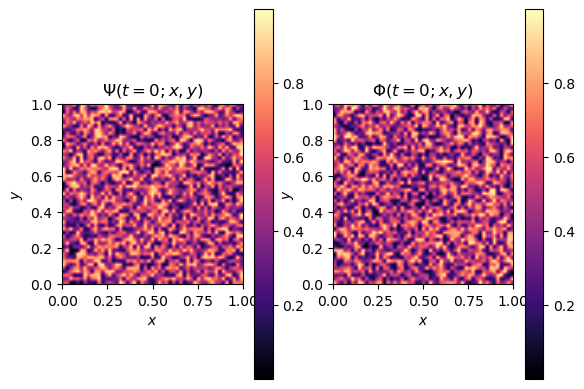

In [2]:
#Condiciones iniciales aleatorias
Phi = np.zeros([len(T),len(X),len(Y)])
Psi = np.zeros([len(T),len(X),len(Y)])

for i in range(len(X)):
    for j in range(len(Y)):
        Psi[0,i,j] = np.random.random()
        Phi[0,i,j] = np.random.random()

#Plot de condiciones iniciales
plt.subplot(1,2,1)
plt.imshow(Psi[0],extent=(min(X),max(X),min(Y),max(Y)),origin='lower',cmap='magma',interpolation='bilinear')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$\Psi(t=0;x,y)$')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(Phi[0],extent=(min(X),max(X),min(Y),max(Y)),origin='lower',cmap='magma',interpolation='bilinear')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$\Phi(t=0;x,y)$')
plt.colorbar()


plt.show()        

In [3]:
#Solución de la ecuación diferencial
for t in range(len(T)-1):
    for i in range(1,len(X)-1):
        for j in range(1,len(Y)-1):
            
            #Condiciones de frontera del problema
            Phi[t,0,j]  = Phi[t,1,j]
            Phi[t,-1,j] = Phi[t,-2,j]
    
            Psi[t,0,j]  = Psi[t,1,j]
            Psi[t,-1,j] = Psi[t,-2,j]
            
            Phi[t,i,0]  = Phi[t,i,1]
            Phi[t,i,-1] = Phi[t,i,-2]
    
            Psi[t,i,0]  = Psi[t,i,1]
            Psi[t,i,-1] = Psi[t,i,-2]   
            
            #Laplacianos
            LapPhi = (Phi[t,i+1,j] + Phi[t,i-1,j] + Phi[t,i,j+1] + Phi[t,i,j-1] - 4* Phi[t,i,j])/h**2
            LapPsi = (Psi[t,i+1,j] + Psi[t,i-1,j] + Psi[t,i,j+1] + Psi[t,i,j-1] - 4* Psi[t,i,j])/h**2
            #Soluciones
            Phi[t+1,i,j] = Phi[t,i,j] + dt*(a*LapPhi + Phi[t,i,j] - Phi[t,i,j]**3 - Psi[t,i,j] + kappa)
            Psi[t+1,i,j] = Psi[t,i,j] + dt*(b*LapPsi + Phi[t,i,j] - Psi[t,i,j])/tau
        
#Se insertan las condiciones de frontera para t=10
for i in range(len(X)):
    for j in range(len(Y)):
            Phi[-1,0,j]  = Phi[-1,1,j]
            Phi[-1,-1,j] = Phi[-1,-2,j]
    
            Psi[-1,0,j]  = Psi[-1,1,j]
            Psi[-1,-1,j] = Psi[-1,-2,j]
        
            Phi[-1,i,0]  = Phi[-1,i,1]
            Phi[-1,i,-1] = Phi[-1,i,-2]
    
            Psi[-1,i,0]  = Psi[-1,i,1]
            Psi[-1,i,-1] = Psi[-1,i,-2]     

---
**II.** Gráficos de la solución $\phi(t;x,y)$ para los tiempos $t=0,2,4,6,8,10$

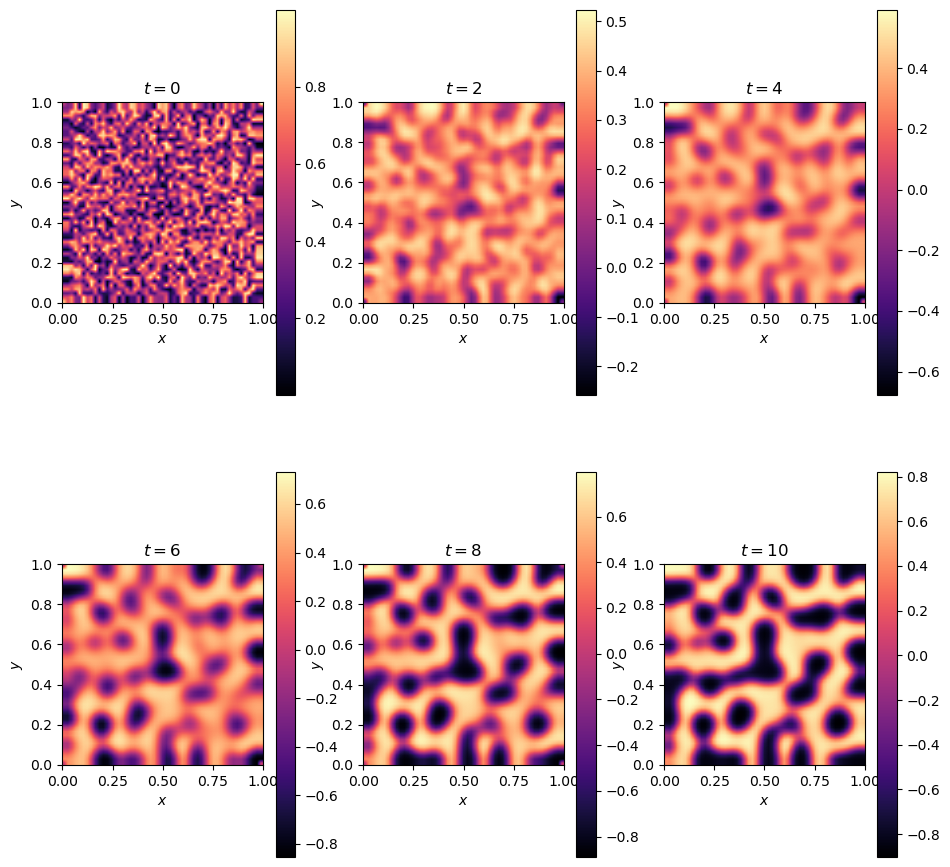

In [9]:
#Plot en los tiempos 0,2,4,6,8,10
plt.figure(figsize=(11,11))
plt.subplot(2,3,1)
plt.imshow(Phi[0],extent=(min(X),max(X),min(Y),max(Y)),origin='lower',cmap='magma',interpolation='bilinear')
plt.title(r'$t=0$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar()
plt.subplot(2,3,2)
plt.imshow(Phi[2000],extent=(min(X),max(X),min(Y),max(Y)),origin='lower',cmap='magma',interpolation='bilinear')
plt.title(r'$t=2$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar()
plt.subplot(2,3,3)
plt.imshow(Phi[4000],extent=(min(X),max(X),min(Y),max(Y)),origin='lower',cmap='magma',interpolation='bilinear')
plt.title(r'$t=4$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar()
plt.subplot(2,3,4)
plt.imshow(Phi[6000],extent=(min(X),max(X),min(Y),max(Y)),origin='lower',cmap='magma',interpolation='bilinear')
plt.title(r'$t=6$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar()
plt.subplot(2,3,5)
plt.imshow(Phi[8000],extent=(min(X),max(X),min(Y),max(Y)),origin='lower',cmap='magma',interpolation='bilinear')
plt.title(r'$t=8$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar()
plt.subplot(2,3,6)
plt.imshow(Phi[10000],extent=(min(X),max(X),min(Y),max(Y)),origin='lower',cmap='magma',interpolation='bilinear')
plt.title(r'$t=10$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar()


plt.show() 

En las figuras se evidencia que surgen regiones en donde se acumulan pigmentos. Además, a partir del tiempo $t=4$ se logra apreciar que la solución para $\phi(t;x,y)$ tiende a un patrón estacionario, sin embargo, se requieren de soluciones para tiempos mayores a $t=10$ con las cuales se logre comprobar dicha hipótesis. 